In [161]:
#Importing all the required library functions
import pandas as pd
import scipy.io 
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression 
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Lasso

In [162]:
#Importing the training data(2010 Rainfall Data)
rainfall_2010_data=scipy.io.loadmat('2010rainfall.mat')

#Importing the test data(2011 Rainfall Data)
rainfall_2011_data=scipy.io.loadmat('2011rainfall.mat')

In [163]:
#Shape of the training data
print('Shape of the training data: ',rainfall_2010_data['XR1'].shape)

#Shape of the testing data
print('Shape of the testing data: ',rainfall_2011_data['XR'].shape)

Shape of the training data:  (357, 122)
Shape of the testing data:  (357, 122)


In [164]:
#Function to create representation of training dataset
def data_table_2010(data_mat):
  days = []
  for i in range(len(data_mat['XR1'][0])):
    days.append(i+1)
  location=[]
  for i in range(len(data_mat['XR1'])):
    location.append(i+1)
  return pd.DataFrame(data=data_mat['XR1'],index=location,columns=days)

#Function to create representation of test dataset
def data_table_2011(data_mat):
  days = []
  for i in range(len(data_mat['XR'][0])):
    days.append(i+1)
  location=[]
  for i in range(len(data_mat['XR'])):
    location.append(i+1)
  return pd.DataFrame(data=data_mat['XR'],index=location,columns=days)

In [165]:
#Creating a data table for Rainfall in 2010 ~ XR1
rainfall_2010 = data_table_2010(rainfall_2010_data)

#Creating a data table for Rainfall in 2011 ~ XR
rainfall_2011 = data_table_2011(rainfall_2011_data)

In [166]:
#Rainfall 2010 ~XR1
rainfall_2010

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122
1,0.000000,0.000000,0.000000,0.000000,0.000000,13.246254,67.325218,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.496031,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.550513,8.844923,0.376718,6.152055,7.024347,10.212214,...,1.388888,0.334241,0.000000,0.000000,0.000000,0.000000,1.803975,0.403163,1.392109,0.207513,89.597115,12.007638,3.578575,0.000000,0.496665,0.000000,0.000000,0.000000,0.000000,39.621731,11.624801,16.166597,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,13.200000,67.599998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,8.200000,0.000000,6.200000,6.400000,9.999999,...,1.400000,0.300000,0.000000,0.000000,0.000000,0.000000,1.800000,0.400000,1.200000,0.000000,90.099998,12.100000,3.600000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,39.299999,11.200000,15.699999,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.467299,10.927622,0.000000,0.000000,18.999964,27.752983,2.414766,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,1.369569,0.000000,0.0,0.000000,0.000000,0.000000,0.360413,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,14.526440,64.651741,73.274498,57.770893,11.917695,42.063477,12.755408,...,0.216248,1.717141,1.925037,0.708858,0.764188,5.748577,5.270830,0.120367,55.314716,46.596664,35.428005,7.249142,1.708353,14.428653,2.967422,0.930822,10.031169,15.998048,1.297486,47.926792,57.011959,62.661652,2.692502,0.0,7.280339,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.469477,6.805963,0.000000,0.000000,23.731779,33.303631,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.745252,78.531937,90.223160,44.558865,0.179480,53.687874,20.703924,...,0.000000,3.005154,0.891532,0.000000,0.260821,3.967124,4.839724,2.360369,24.194036,38.366489,30.841822,1.334781,1.103304,7.715899,0.867365,1.613301,4.776968,0.357280,0.000000,58.134678,73.467232,79.234886,2.913511,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.170385
5,0.000000,0.000000,6.611897,0.000000,0.000000,10.257844,56.923618,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.367834,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.235341,3.821460,5.801683,8.620442,1.493381,4.683495,7.947594,8.479486,...,1.265277,0.355482,0.000000,0.000000,0.000000,0.537301,11.886994,8.460486,18.896152,2.159250,85.179817,8.914422,2.909730,0.414099,3.806158,2.372265,0.000000,1.060152,0.000000,38.465660,11.659060,13.772415,1.674855,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.543626
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [167]:
#Rainfall 2011 ~XR
rainfall_2011

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.185278,0.000000,0.000000,0.000000,0.000000,2.033708,0.000000,0.184883,0.000000,2.680797,4.948352,5.173365,0.138860,...,0.369765,0.000000,0.000000,0.000000,0.381641,1.078712,2.762939,15.534396,31.112030,19.460709,5.486663,5.964305,17.108110,3.543520,2.559318,127.579361,121.933098,3.120047,0.0,0.000000,15.017424,8.859507,19.032047,0.000000,0.000000,2.320731,3.249167,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.958035,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.008009,11.046118,23.083147,18.015162,11.933199,12.927632,34.816326,0.000000,0.000000,72.575233,78.449051,5.970378,0.0,0.000000,10.052490,2.070224,29.887758,0.000000,0.000000,0.000000,2.012872,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
3,0.000000,0.000000,0.000000,21.500555,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.325026,4.442735,7.948280,75.593704,8.080275,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.776277,5.391882,2.522401,7.840161,12.483876,17.858332,19.607910,...,2.305163,35.359970,0.000000,0.000000,10.266807,7.287509,29.613338,5.146783,38.125687,0.545599,1.091198,6.700237,6.558243,22.360601,85.824715,186.834686,75.342026,4.566547,0.0,0.000000,0.000000,30.210543,15.056442,0.000000,0.000000,2.149278,38.689827,0.000000,0.0,0.0,0.00000,0.000000,0.0,1.563111,0.000000,0.000000,0.000000,0.000000,0.0,0.0
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.639077,6.604940,0.108992,0.0,0.0,0.00000,0.0,0.0,0.217983,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.290645,0.326975,0.000000,9.373127,1.250425,0.326975,0.000000,34.397381,11.856451,15.145469,...,0.000000,16.189949,0.000000,0.000000,3.344543,3.935243,8.378140,33.333427,54.624939,13.371160,0.363306,19.586903,0.625213,22.111752,66.274300,138.969025,59.655888,2.638884,0.0,0.000000,0.494259,48.747658,7.988505,2.216165,1.036551,4.511424,1.015970,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.00000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.232115,0.000000,0.000000,0.000000,0.541212,6.702410,6.658057,1.495367,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.121333,1.944354,16.418554,45.220749,8.702755,0.470484,4.417555,12.431360,3.968278,13.383103,39.888123,210.623093,2.181559,0.0,1.764315,1.192227,2.661123,5.596737,0.000000,0.676007,1.088342,4.301603,0.000000,0.0,0.0,0.00000,0.000000,0.0,0.588105,0.000000,0.000000,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,34.099937,12.399961,17.000019,68.500015,6.099988,20.499962,0.0,26.000074,0.599999

In [168]:
#Function for creating the data
def train_data(data,s):
  X_train = np.zeros((data.shape[0]+2,data.shape[1]-2))
  for day in range(3,data.shape[1]+1):
    for location in range(1,data.shape[0]+1):
      X_train[location-1][day-3]=data[day][location]
      X_train[data.shape[0]-1][day-3] = data[day-1][s]
      X_train[data.shape[0]][day-3] = data[day-2][s]

  X_train = np.delete(X_train,(s-1),axis=0)

  y_train= np.zeros((1,data.shape[1]-2))
  for day in range(1,data.shape[1]+1):
    y_train[0][day-3] = data[day][s]

  return X_train,y_train

In [169]:
#Creating the training data for Bombay using train_data function
X_train_bombay,y_train_bombay = train_data(rainfall_2010,42)

#Creating the test data for Bombay using train_data function
X_test_bombay,y_test_bombay = train_data(rainfall_2011,42)

In [145]:
#Creating the training data for Delhi using train_data function
X_train_delhi,y_train_delhi=train_data(rainfall_2010,158)

#Creating the training data for Delhi using train_data function
X_test_delhi,y_test_delhi=train_data(rainfall_2011,158)

In [146]:
#Creating the training data for Kharagpur using train_data function
X_train_kgp,y_train_kgp = train_data(rainfall_2010,299)

#Creating the training data for Kharagpur using train_data function
X_test_kgp,y_test_kgp = train_data(rainfall_2011,299)

In [147]:
#Function to determine parameters and bias for training data using Linear Regression
def Linear_Regression(X_train,y_train):
  reg = LinearRegression() 
  reg.fit(X_train.T, y_train.T)
  return reg.coef_,reg.intercept_

In [148]:
#Determine the parameters and bias for Bombay Training Data Set
w_bombay,b_bombay = Linear_Regression(X_train_bombay,y_train_bombay)

#Determine the parameters and bias for Delhi Training Data Set
w_delhi,b_delhi = Linear_Regression(X_train_delhi,y_train_delhi)

#Determine the parameters and bias for Kharagpur Training Data Set
w_kgp,b_kgp = Linear_Regression(X_train_kgp,y_train_kgp)

In [149]:
#Function to determine Mean Squared Error and Mean Absolute error
def mean_sq_abs_error(w,b,X_test,y_test):
  y_pred = b + np.dot(w,X_test)
  return (mean_squared_error(y_test,y_pred),mean_absolute_error(y_test,y_pred))

In [150]:
#Determine the Mean Squared Error and Mean Absolute Error for Bombay
mse_bombay,mbe_bombay = mean_sq_abs_error(w_bombay,b_bombay,X_test_bombay,y_test_bombay)

#Determine the Mean Squared Error and Mean Absolute Error for Delhi
mse_delhi,mbe_delhi = mean_sq_abs_error(w_delhi,b_delhi,X_test_delhi,y_test_delhi)

#Determine the Mean Squared Error and Mean Absolute Error for Kharagpur
mse_kgp,mbe_kgp = mean_sq_abs_error(w_kgp,b_kgp,X_test_kgp,y_test_kgp)

In [151]:
#Printing the Mean Squared Error for Kharagpur,Delhi and Bombay
print("The Mean Absolute Error for Bombay: ",mbe_bombay)
print("The Mean Sqaure Error for Bombay: ",mse_bombay)

print()
#Printing the Mean Squared Error and Mean Absolute Error for Delhi
print("The Mean Absolute Error for Delhi: ",mbe_delhi)
print("The Mean Sqaure Error for Delhi: ",mse_delhi)

print()
#Printing the Mean Squared Error and Mean Absolute Error for Delhi
print("The Mean Absolute Error for Kharagpur: ",mbe_kgp)
print("The Mean Sqaure Error for Kharagpur: ",mse_kgp)

The Mean Absolute Error for Bombay:  27.123974605327664
The Mean Sqaure Error for Bombay:  1307.317836518758

The Mean Absolute Error for Delhi:  15.616612309509373
The Mean Sqaure Error for Delhi:  456.2140140776813

The Mean Absolute Error for Kharagpur:  17.034490349554805
The Mean Sqaure Error for Kharagpur:  519.9075235893562


Text(0, 0.5, 'Co-efficients')

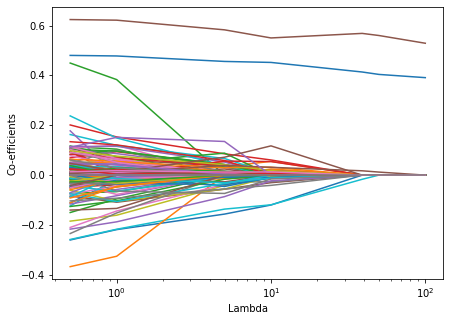

In [152]:
#Lasso Regression for Bombay
lasso = Lasso()
coeff=[]
alphas = [0.5, 1, 5, 10,39, 50, 100]

#Finding the coeff for different alphas 
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train_bombay.T, y_train_bombay.T)
    coeff.append(lasso.coef_)

#Plotting Co-efficients vs Lambda
plt.figure(figsize=(7,5))   
ax = plt.gca()
ax.plot(alphas, coeff)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('Lambda')
plt.ylabel('Co-efficients')

In [153]:
#Finding the most important features for Bombay Rainfall
most_imp_bombay={}
for i in range(len(coeff[4])):
  if coeff[4][i]!=0:
    most_imp_bombay[i+3]=coeff[4][i]
most_imp_bombay.pop(min(most_imp_bombay))
print("The most important features for Bombay are:")
print('Days:',end=' ')
print(*list(most_imp_bombay.keys()),sep=',')

The most important features for Bombay are:
Days: 8,28,42,43,318


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11.491167385728687, tolerance: 2.7930952380921577
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.016303616952882, tolerance: 2.7930952380921577
  positive)


Text(0, 0.5, 'Co-efficients')

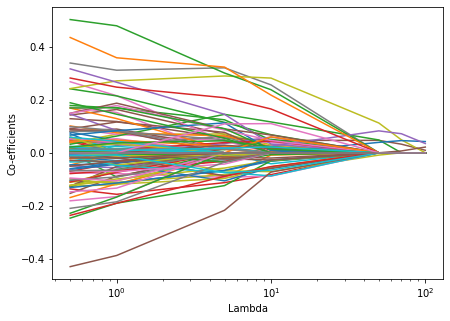

In [154]:
#Lasso Regression for Delhi
lasso = Lasso()
coeff_delhi=[]
alphas = [0.5, 1, 5, 10, 50,70, 100]

#Finding the coeff for different alphas 
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train_delhi.T, y_train_delhi.T)
    coeff_delhi.append(lasso.coef_)

#Plotting Co-efficients vs Lambda
plt.figure(figsize=(7,5))   
ax = plt.gca()
ax.plot(alphas, coeff_delhi)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('Lambda')
plt.ylabel('Co-efficients')

In [155]:
#Finding the most important features for Delhi Rainfall
most_imp_delhi={}
for i in range(len(coeff_delhi[4])):
  if coeff_delhi[4][i]!=0:
    most_imp_delhi[i+1]=coeff_delhi[4][i]
print("The most important features for Delhi are:")
print('Days:',end=' ')
print(list(most_imp_delhi.keys()),sep=',')

The most important features for Delhi are:
Days: [26, 59, 133, 159, 161, 215, 320]


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14.636358380228842, tolerance: 2.220230646391177
  positive)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.384110484671737, tolerance: 2.220230646391177
  positive)


Text(0, 0.5, 'Co-efficients')

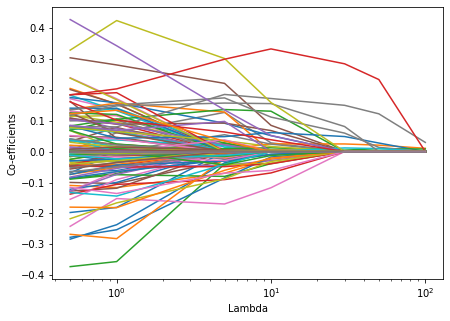

In [156]:
#Lasso Regression for Kharagpur
lasso = Lasso()
coeff_kgp =[]
alphas = [0.5, 1, 5, 10, 30, 50 , 100]

#Finding the coeff for different alphas 
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train_kgp.T, y_train_kgp.T)
    coeff_kgp.append(lasso.coef_)

#Plotting Co-efficients vs Lambda
plt.figure(figsize=(7,5))   
ax = plt.gca()
ax.plot(alphas, coeff_kgp)
ax.set_xscale('log')
plt.axis('tight')
plt.xlabel('Lambda')
plt.ylabel('Co-efficients')

In [157]:
most_imp_kgp={}
for i in range(len(coeff_kgp[4])):
  if coeff_kgp[4][i]!=0:
    most_imp_kgp[i+3]=coeff_kgp[4][i]
print("The most important features for Kharagpur are:")
print('Days:',end = ' ')
print(*list(most_imp_kgp.keys()),sep=',')

The most important features for Kharagpur are:
Days: 87,164,233,235,250,280,292,300,306


In [158]:
XR1= rainfall_2010_data['XR1']
ZR1= rainfall_2010_data['ZR1']
#Using The Decision Tree Regressor Model for given training data(2010 Rainfall  Data)
clf=DecisionTreeClassifier(random_state=0)

#Fitting the training data
clf.fit(XR1.T,ZR1.T)

#Determining the feature importance using the corresponding values
features=(clf.feature_importances_).reshape(357,1)

In [159]:
discriminative_features=[]
for i in range(features.shape[0]):
  if(features[i][0]>0.0):
    discriminative_features.append(i+1)
print("Following are the index of the most discriminative features:",discriminative_features)

Following are the index of the most discriminative features: [27, 28, 67, 160, 163, 185, 206, 253, 347]


In [160]:
ZR2=(rainfall_2011_data['ZR']).reshape(122,1)
XR2=rainfall_2011_data['XR']
y_predict=(clf.predict(XR2.T)).reshape(122,1)
accuracy=0
for i in range(y_predict.shape[0]):
  if(y_predict[i]==ZR2[i]):
    accuracy+=1
accuracy=accuracy/y_predict.shape[0]*100

print("Accuracy of given Decision Tree Model on Test Data:",accuracy)

Accuracy of given Decision Tree Model on Test Data: 71.31147540983606
